<a href="https://colab.research.google.com/github/nikhilbansal23/WalmartBlackFridayPurchaseAnalysis/blob/main/Walmart_Black_Friday_Purchases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
walmart_df = pd.read_csv("/content/drive/MyDrive/Datasets/Walmart- Black Friday Purchases/walmart_data.csv")


# Data Sanity Check/ Checking and Handling data anomalies (if any)

In [3]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
#checking data dimensionality
walmart_df.count()

User_ID                       550068
Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
City_Category                 550068
Stay_In_Current_City_Years    550068
Marital_Status                550068
Product_Category              550068
Purchase                      550068
dtype: int64

In [5]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Their are totla 10 columns with no null values present. There are 550068 rows in the dataset

Assuming 0 as customer who is Unmarried and 1 as Married, renaming values accordingly to understand data more clearly as we need to understand purchasing pattern on comparing both gender

In [3]:
walmart_df['Marital_Status'] = walmart_df['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'})

In [13]:
walmart_df.groupby(by='Gender').size()

Gender
F    135809
M    414259
dtype: int64

Looks like Males have made more purchases as compared to females

Basing out the comparison on the basis of volume will not justify the comparison to that extend so we need to compare both gender's purchasing habbits based on other data points as well

In [8]:
walmart_df.groupby(by='Gender')['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

Since the currency is not clear from the data but looking at the amount sum spend, Males have spend more during Black Firday

# Deduplicating the data
There are 5.8k unique customers who shopped on black friday, deduplicating the df will help us understanding customer behaviour at a more granular way

In [14]:
walmart_df['User_ID'].nunique()

5891

In [4]:
unique_df = walmart_df.drop_duplicates('User_ID', keep='last')

In [16]:
len(unique_df)

5891

In [38]:
gender_df = unique_df.groupby('Gender').size().reset_index()
gender_df = gender_df.rename(columns = {
    0:"customer_count"
})
# gender_df

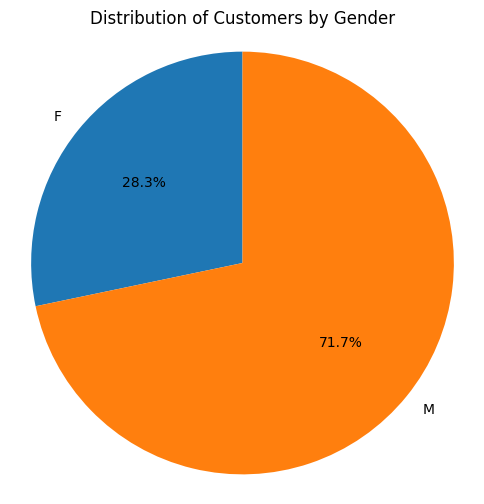

In [39]:
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(gender_df['customer_count'], labels=gender_df['Gender'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customers by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()

In [17]:
#lets look at gender distinction again w.r.t to unique customers
marital_status = unique_df.groupby(by='Marital_Status').size().reset_index()
marital_status = marital_status.rename(columns = {
    0:"customer_count"
})

We can see that most of the customers are unmarried.

<Axes: xlabel='Marital_Status'>

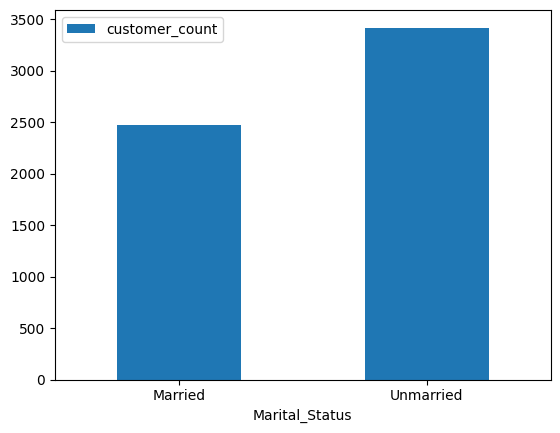

In [23]:
marital_status.plot.bar(x='Marital_Status', y='customer_count', rot=0)

In [22]:
#lets look at gender distinction again w.r.t to unique customers
marital_status = unique_df.groupby(by='Marital_Status')['Purchase'].sum().reset_index()
marital_status = marital_status.rename(columns = {
    'Purchase':"purchase_sum"
})

In [23]:
marital_status.head()

,Marital_Status,purchase_sum
0,Married,7535381
1,Unmarried,9748773


<Axes: xlabel='Marital_Status'>

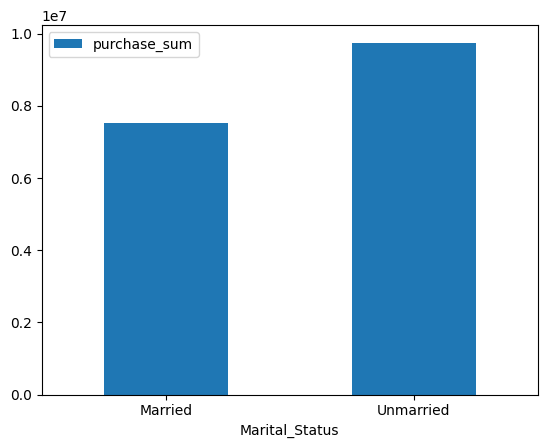

In [24]:
marital_status.plot.bar(x='Marital_Status', y='purchase_sum', rot=0)

In [30]:
marital_status_gender = unique_df.groupby(by=['Marital_Status','Gender']).size().reset_index()
marital_status_gender = marital_status_gender.rename(columns = {
    0:"customer_count"
})
# marital_status_gender.head()

# Marital Status making purchases by Gender

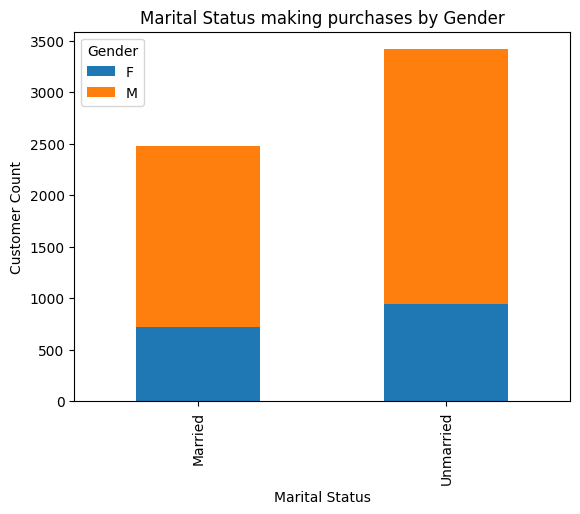

In [29]:
pivot_df = marital_status_gender.pivot(index='Marital_Status', columns='Gender', values='customer_count')
# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Customer Count')
plt.title('Marital Status making purchases by Gender')

# Show the chart
plt.show()

Out of the total customers, most of the purchases made are done by unmarried people and out of them most purchases were done by Male people.

# Marital Status spending by Gender

In [34]:
marital_status_gender = unique_df.groupby(by=['Marital_Status','Gender'])['Purchase'].sum().reset_index()
marital_status_gender = marital_status_gender.rename(columns = {
    'Purchase':"purchase_sum"
})
marital_status_gender.head()

,Marital_Status,Gender,purchase_sum
0,Married,F,2089650
1,Married,M,5445731
2,Unmarried,F,2478650
3,Unmarried,M,7270123


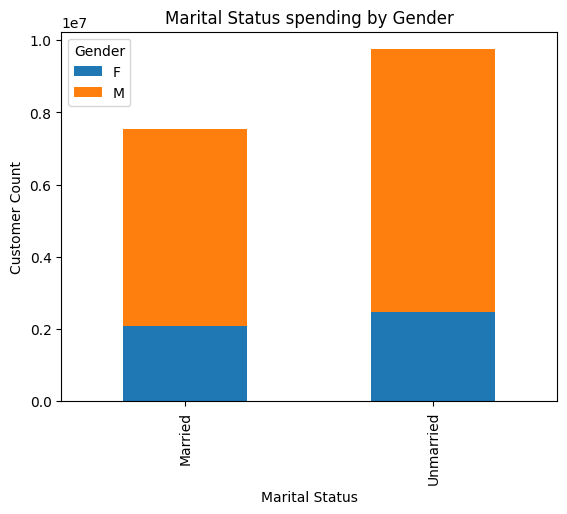

In [35]:
pivot_df = marital_status_gender.pivot(index='Marital_Status', columns='Gender', values='purchase_sum')
# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Customer Count')
plt.title('Marital Status spending by Gender')

# Show the chart
plt.show()

# Spending Nature by Gender w.r.t Stay

In [8]:
df = unique_df.groupby(by=['Gender','Stay_In_Current_City_Years'])['Purchase'].sum().reset_index()
df = df.rename(columns = {
    'Purchase':"purchase_sum"
})
df.head(10)

,Gender,Stay_In_Current_City_Years,purchase_sum
0,F,0,503117
1,F,1,1632539
2,F,2,894350
3,F,3,874254
4,F,4+,664040
5,M,0,1741213
6,M,1,4267431
7,M,2,2494313
8,M,3,2048921
9,M,4+,2163976


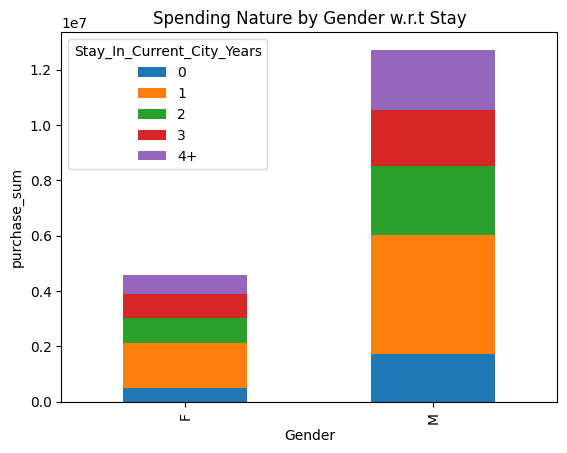

In [9]:
pivot_df = df.pivot(index='Gender', columns='Stay_In_Current_City_Years', values='purchase_sum')
# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('purchase_sum')
plt.title('Spending Nature by Gender w.r.t Stay')

# Show the chart
plt.show()

Both Male and Female customers have a maximum stay in a city for 1 year

# Customers with maximum stay w.r.t City Category

In [14]:
df = unique_df.groupby(by=['Gender','City_Category'])['Purchase'].sum().reset_index()
df = df.rename(columns = {
    'Purchase':"purchase_sum"
})

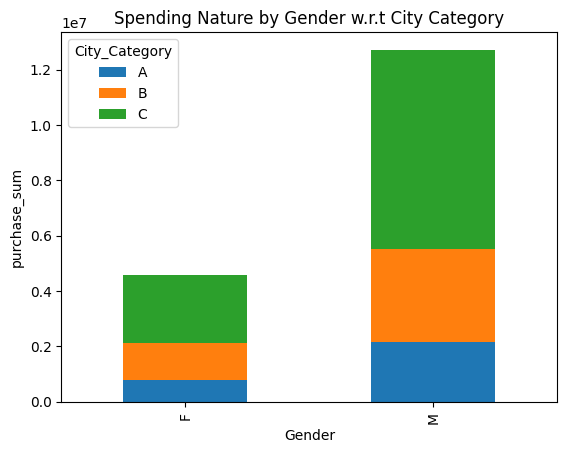

In [15]:
pivot_df = df.pivot(index='Gender', columns='City_Category', values='purchase_sum')
# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('purchase_sum')
plt.title('Spending Nature by Gender w.r.t City Category')

# Show the chart
plt.show()

It seems maximum spend by both the genders mostly stayed in Category C city

# Spending Nature by Gender w.r.t Age

In [18]:
df = unique_df.groupby(by=['Gender','Age'])['Purchase'].sum().reset_index()
df = df.rename(columns = {
    'Purchase':"purchase_sum"
})

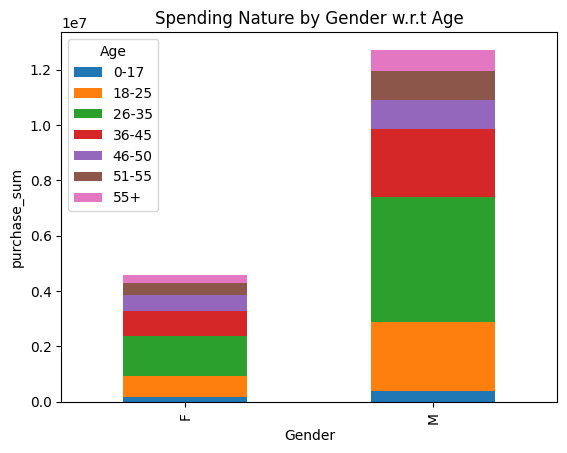

In [17]:
pivot_df = df.pivot(index='Gender', columns='Age', values='purchase_sum')
# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('purchase_sum')
plt.title('Spending Nature by Gender w.r.t Age')

# Show the chart
plt.show()

The age bucket for both the gender customers falls under 26-35

# Top 10 Occupation-Gender Combinations by Purchase Sum

In [19]:
df = unique_df.groupby(by=['Gender','Occupation'])['Purchase'].sum().reset_index()
df = df.rename(columns = {
    'Purchase':"purchase_sum"
})

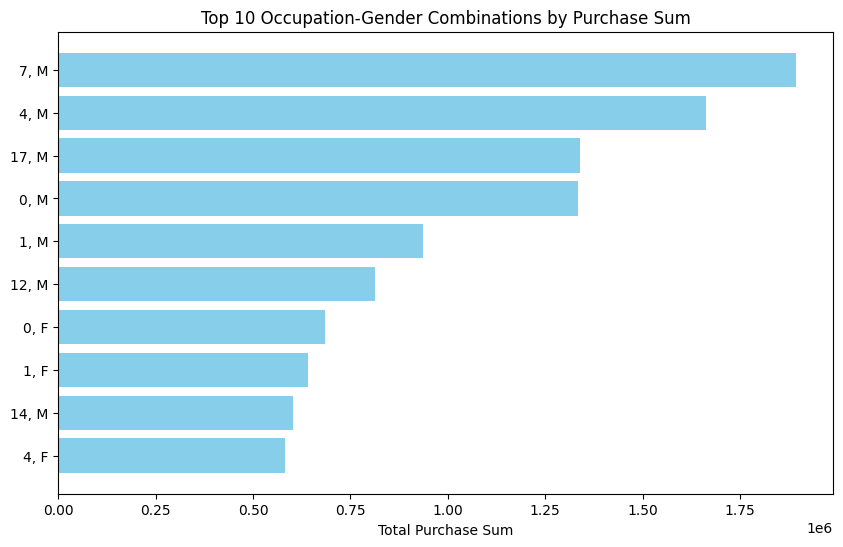

In [33]:
top_N = 10  # You can change this to the desired number of top values
top_data = df.sort_values(by='purchase_sum', ascending=False).head(top_N)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_N), top_data['purchase_sum'], color='skyblue')
plt.yticks(range(top_N), [f"{row['Occupation']}, {row['Gender']}" for _, row in top_data.iterrows()])
plt.xlabel('Total Purchase Sum')
plt.title(f'Top {top_N} Occupation-Gender Combinations by Purchase Sum')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

Most of the male shoppers have their occupation with series 7 whereas females did with occupation series 0 & 1. We only endoded values in this column so cannot determine actual occuptaion for them

In [34]:
df = unique_df.groupby(by=['Gender','Product_Category'])['Purchase'].sum().reset_index()
df = df.rename(columns = {
    'Purchase':"purchase_sum"
})

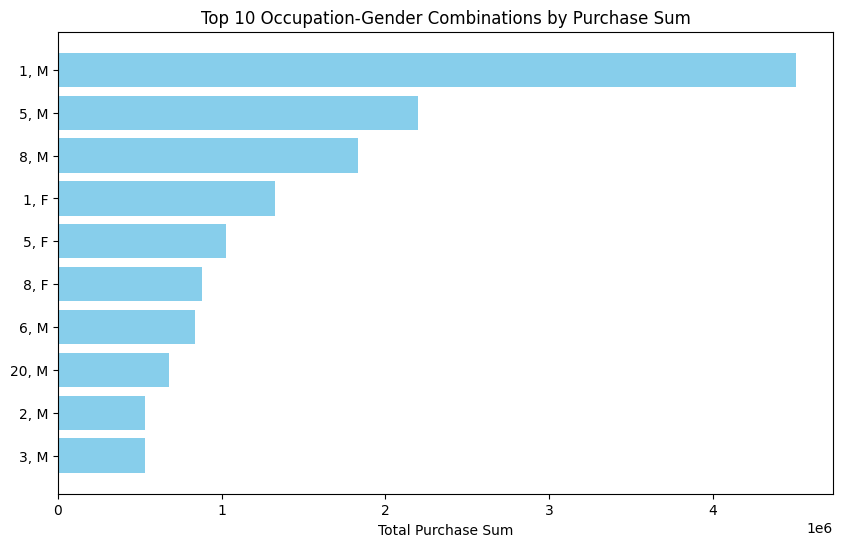

In [37]:
top_N = 10  # You can change this to the desired number of top values
top_data = df.sort_values(by='purchase_sum', ascending=False).head(top_N)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_N), top_data['purchase_sum'], color='skyblue')
plt.yticks(range(top_N), [f"{row['Product_Category']}, {row['Gender']}" for _, row in top_data.iterrows()])
plt.xlabel('Total Purchase Sum')
plt.title(f'Top {top_N} Occupation-Gender Combinations by Purchase Sum')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

Most of the male shoppers shopped for product category 1 & 5, similarly females also purchased product category 1

# Final Hypothesis -
Black Friday purchases data suggested that most of the purchases was done by male customers, the common age of this buyers were between 26-35, also most of the buyers stayed in the city for 1 year and were residing in the category C. Male had their occupation category as 7 where as females had their occupation as 1 & 0. Most common purchased product category for males were 1 & 5 and for females it was product category 1. Females spend around 1.1 billion (assuming dollars) where as males spent around 3.9 billion dollars.